In [3]:
import pandas as pd
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("xAPI-Edu-Data.csv")

In [5]:
df.isna().sum().sum()

61

<AxesSubplot: >

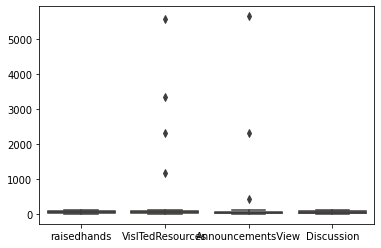

In [21]:
sns.boxplot(df)

In [7]:
Q1 = df.raisedhands.quantile(0.25)
Q1

15.0

In [8]:
Q3 = df.raisedhands.quantile(0.75)
Q3

75.0

In [9]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [1]:
IQR = Q3-Q1
upper  = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

NameError: name 'Q3' is not defined

In [11]:
outliers_AV = find_outliers_IQR(df.AnnouncementsView)
outliers_AV

189    5656.0
209     439.0
221    2324.0
386    3321.0
Name: AnnouncementsView, dtype: float64

In [12]:
def drop_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1


   outliers = find_outliers_IQR(df)
   check = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   outliers_dropped = df.dropna()

   return check

In [13]:
outliers_VR = find_outliers_IQR(df.VisITedResources)
outliers_VR

194    5565.0
235    2328.0
404    3333.0
446    1182.0
Name: VisITedResources, dtype: float64

In [14]:
drop_outliers_IQR(df.VisITedResources)

0      16.0
1      20.0
2       7.0
3      25.0
4      50.0
       ... 
475     4.0
476    77.0
477    74.0
478    17.0
479    14.0
Name: VisITedResources, Length: 476, dtype: float64

In [15]:
outliers_VR = find_outliers_IQR(df.VisITedResources)
outliers_VR

194    5565.0
235    2328.0
404    3333.0
446    1182.0
Name: VisITedResources, dtype: float64

In [16]:
x = drop_outliers_IQR(df.AnnouncementsView)
x

0       2.0
1       3.0
2       0.0
3       5.0
4      12.0
       ... 
475     5.0
476    14.0
477     NaN
478    14.0
479    23.0
Name: AnnouncementsView, Length: 476, dtype: float64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum().sum()

0

<AxesSubplot: >

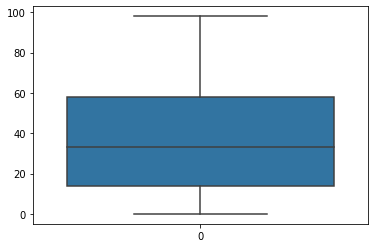

In [22]:
sns.boxplot(x)

In [20]:
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df.AnnouncementsView.to_numpy())

df_scaled = pd.DataFrame(df_scaled, columns=['AnnouncementsView'])

ValueError: Expected 2D array, got 1D array instead:
array=[2.000e+00 3.000e+00 0.000e+00 5.000e+00 1.200e+01 1.300e+01 0.000e+00
 1.600e+01 3.000e+01 0.000e+00 1.200e+01 4.400e+01 2.200e+01 2.000e+01
 3.500e+01 4.000e+01 3.300e+01 4.000e+00 2.000e+00 3.000e+00 3.000e+01
 1.200e+01 5.200e+01 3.300e+01 4.000e+01 1.000e+01 8.000e+00 4.000e+00
 0.000e+00 3.700e+01 3.000e+00 7.000e+00 2.800e+01 3.000e+01 1.500e+01
 1.000e+00 4.000e+01 5.000e+01 1.200e+01 1.600e+01 1.600e+01 1.900e+01
 8.000e+00 4.000e+00 1.900e+01 2.200e+01 2.800e+01 3.200e+01 7.000e+01
 1.600e+01 7.000e+00 1.800e+01 1.900e+01 3.500e+01 1.100e+01 1.000e+01
 9.000e+00 2.000e+00 2.600e+01 6.000e+00 2.900e+01 1.100e+01 4.900e+01
 1.000e+01 1.000e+00 1.000e+01 5.000e+01 1.000e+00 1.000e+01 5.500e+01
 1.900e+01 4.000e+01 3.500e+01 2.000e+00 1.100e+01 3.800e+01 0.000e+00
 9.000e+00 4.000e+01 5.000e+01 2.000e+00 6.000e+00 3.000e+00 5.000e+00
 7.000e+00 4.100e+01 5.000e+00 3.000e+01 5.500e+01 5.100e+01 3.000e+00
 0.000e+00 0.000e+00 1.100e+01 1.200e+01 4.000e+01 2.300e+01 3.000e+00
 0.000e+00 8.000e+00 5.500e+01 7.000e+00 0.000e+00 7.000e+00 6.000e+00
 2.000e+01 2.000e+00 5.000e+00 2.000e+01 1.000e+01 0.000e+00 1.500e+01
 9.500e+01 9.500e+01 5.000e+01 9.500e+01 8.500e+01 5.000e+00 5.000e+01
 5.500e+01 1.500e+01 5.500e+01 5.000e+01 3.000e+01 3.000e+01 5.000e+01
 5.100e+01 7.100e+01 9.800e+01 4.000e+01 7.300e+01 3.000e+01 3.300e+01
 4.800e+01 4.800e+01 5.800e+01 4.500e+01 9.300e+01 8.300e+01 7.300e+01
 5.300e+01 8.300e+01 2.300e+01 2.900e+01 8.300e+01 2.300e+01 5.300e+01
 2.300e+01 7.300e+01 1.300e+01 2.300e+01 8.300e+01 3.300e+01 2.000e+01
 6.300e+01 1.300e+01 6.200e+01 3.200e+01 3.000e+01 8.200e+01 2.200e+01
 5.200e+01 7.200e+01 5.656e+03 3.200e+01 3.700e+01 6.200e+01 6.200e+01
 7.200e+01 4.200e+01 6.200e+01 6.200e+01 4.200e+01 1.200e+01 5.200e+01
 5.200e+01 1.200e+01 4.200e+01 1.200e+01 4.200e+01 4.200e+01 4.200e+01
 4.900e+01 4.390e+02 8.200e+01 4.200e+01 4.200e+01 2.200e+01 2.000e+00
 4.200e+01 3.200e+01 4.000e+01 4.200e+01 4.600e+01 4.100e+01 2.324e+03
 8.200e+01 1.200e+01 2.200e+01 1.200e+01 6.200e+01 2.000e+00 7.700e+01
 2.100e+01 1.200e+01 2.100e+01 1.500e+01 5.800e+01 5.800e+01 1.800e+01
 1.300e+01 5.800e+01 5.800e+01 9.800e+01 1.800e+01 3.800e+01 8.300e+01
 5.200e+01 6.200e+01 8.200e+01 2.000e+00 6.200e+01 3.200e+01 3.200e+01
 1.200e+01 4.200e+01 1.200e+01 7.200e+01 6.600e+01 8.600e+01 1.200e+01
 1.200e+01 8.200e+01 5.200e+01 4.200e+01 8.200e+01 1.200e+01 3.200e+01
 1.000e+01 4.000e+01 5.200e+01 3.200e+01 2.000e+00 6.000e+00 8.200e+01
 8.000e+01 2.200e+01 4.200e+01 5.200e+01 4.600e+01 5.600e+01 5.600e+01
 7.200e+01 8.200e+01 3.200e+01 3.500e+01 8.500e+01 6.500e+01 7.600e+01
 1.200e+01 8.200e+01 7.200e+01 8.200e+01 7.200e+01 8.600e+01 8.200e+01
 2.600e+01 3.200e+01 2.000e+01 1.500e+01 2.100e+01 2.500e+01 2.900e+01
 7.400e+01 5.900e+01 7.400e+01 2.900e+01 6.900e+01 7.400e+01 8.900e+01
 8.300e+01 8.300e+01 1.300e+01 2.300e+01 2.300e+01 2.000e+01 1.000e+01
 2.000e+01 1.800e+01 3.300e+01 1.000e+01 6.300e+01 2.900e+01 3.000e+01
 2.900e+01 9.000e+00 1.200e+01 2.000e+01 1.500e+01 1.000e+01 1.100e+01
 1.300e+01 5.000e+01 2.900e+01 1.500e+01 2.000e+01 1.500e+01 2.000e+01
 9.000e+00 1.200e+01 4.000e+01 2.100e+01 4.200e+01 4.100e+01 2.100e+01
 5.200e+01 5.100e+01 3.100e+01 4.100e+01 4.100e+01 2.100e+01 3.100e+01
 5.100e+01 6.000e+01 5.100e+01 5.000e+01 2.200e+01 1.900e+01 4.000e+01
 2.900e+01 5.000e+01 5.000e+01 5.900e+01 2.000e+01 2.900e+01 2.000e+01
 2.900e+01 4.900e+01 3.100e+01 1.100e+01 1.000e+00 5.000e+01 5.000e+01
 5.700e+01 5.000e+01 5.400e+01 4.600e+01 8.600e+01 4.000e+01 3.400e+01
 8.000e+01 6.400e+01 7.000e+01 8.700e+01 1.000e+01 1.900e+01 1.000e+01
 9.000e+00 1.200e+01 1.900e+01 6.600e+01 7.900e+01 2.000e+00 9.000e+00
 8.600e+01 8.900e+01 7.600e+01 2.900e+01 4.600e+01 4.900e+01 7.600e+01
 7.900e+01 6.200e+01 6.900e+01 2.000e+00 9.000e+00 2.200e+01 2.300e+01
 6.200e+01 7.300e+01 7.200e+01 7.100e+01 7.000e+01 7.500e+01 8.600e+01
 8.500e+01 7.600e+01 6.500e+01 6.400e+01 6.600e+01 7.400e+01 6.700e+01
 7.400e+01 7.700e+01 2.200e+01 2.000e+01 5.200e+01 4.000e+01 5.700e+01
 4.300e+01 5.200e+01 8.000e+01 8.200e+01 8.300e+01 8.300e+01 4.200e+01
 4.500e+01 6.400e+01 6.300e+01 1.400e+01 1.500e+01 8.600e+01 7.800e+01
 7.900e+01 4.000e+00 5.000e+00 1.400e+01 1.400e+01 2.300e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df.to_numpy()

array([['M', 'KW', 'KuwaIT', ..., 'Good', 'Under-7', 'M'],
       ['M', 'KW', 'KuwaIT', ..., 'Good', 'Under-7', 'M'],
       ['M', 'KW', 'KuwaIT', ..., 'Bad', 'Above-7', 'L'],
       ...,
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Under-7', 'M'],
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Above-7', 'L'],
       ['F', 'Jordan', 'Jordan', ..., 'Bad', 'Above-7', 'L']],
      dtype=object)

In [ ]:
ac = df.AnnouncementsView
df_ac_norm = ((ac - ac.min())/(ac.max() - ac.min()))
df_ac_norm.head()

0    0.000354
1    0.000530
2    0.000000
3    0.000884
4    0.002122
Name: AnnouncementsView, dtype: float64